In [1]:
## import the basic modules in python
import numpy as numpy
import pandas as pd
import random as rd

In [2]:
## data downloaded from kaggle https://www.kaggle.com/datasets/mansoordaku/ckdisease/
kidney_df=pd.read_csv('/Users/subasrees/Desktop/Machine_learning_practice/kidney_disease.csv')
kidney_df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [3]:
print(len(kidney_df.columns))

26


In [4]:
# explanation of the columns ie features taken from https://www.kaggle.com/datasets/mansoordaku/ckdisease/
kidney_df.columns=['id','age',	'blood pressure',	'specific gravity',	'albumin',	'sugar',	'red blood cells',	'pus cell',	'pus cell clumps',	'bacteria',	'blood glucose random',	'blood urea',	'serum creatinine',	'sodium',	'potassium',	'hemoglobin',	'packed cell volume',	'white blood cell count',	'red blood cell count',	'hypertension',	'diabetes mellitus',	'coronary artery disease',	'appetite',	'pedal edema',	'anemia','classification']

In [5]:
## missing values 
kidney_df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       130
white blood cell count     105
potassium                   88
sodium                      87
packed cell volume          70
pus cell                    65
hemoglobin                  52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
id                           0
classification               0
dtype: int64

In [6]:
## data types of features for data imputation
for i in kidney_df.columns:
    print(f"{i}:{kidney_df[i].dtype}")

id:int64
age:float64
blood pressure:float64
specific gravity:float64
albumin:float64
sugar:float64
red blood cells:object
pus cell:object
pus cell clumps:object
bacteria:object
blood glucose random:float64
blood urea:float64
serum creatinine:float64
sodium:float64
potassium:float64
hemoglobin:float64
packed cell volume:object
white blood cell count:object
red blood cell count:object
hypertension:object
diabetes mellitus:object
coronary artery disease:object
appetite:object
pedal edema:object
anemia:object
classification:object


In [7]:
## convert the datatypes of numerical datatypes given as objects
def convert_to_num(df_data,column):
    df_data[column]=pd.to_numeric(df_data[column],errors='coerce')
    
## data imputation - mean values for numerical values
def impute_mean(df_data,column):
    df_data[column].fillna(value=df_data[column].mean(),inplace=True)
    
## data imputation - mode values for categorical values
def impute_mode(df_data,column):
    df_data[column].fillna(value=df_data[column].mode()[0],inplace=True)#{df_data[column]:df_data[column].mode()[0]}


In [8]:
## find the features that are originally given as objects
object_col=[]
for i in kidney_df.columns:
    if kidney_df[i].dtype=='object':
        object_col.append(i)
print(object_col)

['red blood cells', 'pus cell', 'pus cell clumps', 'bacteria', 'packed cell volume', 'white blood cell count', 'red blood cell count', 'hypertension', 'diabetes mellitus', 'coronary artery disease', 'appetite', 'pedal edema', 'anemia', 'classification']


In [9]:
## evaluate the features that are of object type
for i in object_col:
    print(i)
    print(kidney_df[i].unique())

red blood cells
[nan 'normal' 'abnormal']
pus cell
['normal' 'abnormal' nan]
pus cell clumps
['notpresent' 'present' nan]
bacteria
['notpresent' 'present' nan]
packed cell volume
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
white blood cell count
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '880

In [10]:
## create a feature and target dataframe
kidney_features=kidney_df.iloc[:,1:len(kidney_df.columns)-1]
kidney_target=kidney_df['classification']

In [11]:
kidney_features.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       130
white blood cell count     105
potassium                   88
sodium                      87
packed cell volume          70
pus cell                    65
hemoglobin                  52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
dtype: int64

In [12]:
col_3=['packed cell volume','white blood cell count','red blood cell count']
for i in col_3:
    convert_to_num(kidney_features,i)
    impute_mean(kidney_features,i)

/var/folders/yl/47vnp0617dn9zfv19_vrxwjh0000gn/T/ipykernel_76294/44891948.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data[column].fillna(value=df_data[column].mean(),inplace=True)


In [13]:
for i in object_col:
    if i !='classification':
        print(i)
        print(kidney_features[i].unique())

red blood cells
[nan 'normal' 'abnormal']
pus cell
['normal' 'abnormal' nan]
pus cell clumps
['notpresent' 'present' nan]
bacteria
['notpresent' 'present' nan]
packed cell volume
[44.         38.         31.         32.         35.         39.
 36.         33.         29.         28.         38.88449848 16.
 24.         37.         30.         34.         40.         45.
 27.         48.         52.         14.         22.         18.
 42.         17.         46.         23.         19.         25.
 41.         26.         15.         21.         43.         20.
 47.          9.         49.         50.         53.         51.
 54.        ]
white blood cell count
[ 7800.          6000.          7500.          6700.
  7300.          8406.12244898  6900.          9600.
 12100.          4500.         12200.         11000.
  3800.         11400.          5300.          9200.
  6200.          8300.          8400.         10300.
  9800.          9100.          7900.          6400.
  8600.    

In [14]:
col_2=set(kidney_features.columns)-set(object_col)
col_2=list(col_2)

In [15]:
for i in col_2:
    impute_mean(kidney_features,i)

/var/folders/yl/47vnp0617dn9zfv19_vrxwjh0000gn/T/ipykernel_76294/44891948.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data[column].fillna(value=df_data[column].mean(),inplace=True)


In [16]:
## 
for i in object_col:
    impute_mode(kidney_df,i)

/var/folders/yl/47vnp0617dn9zfv19_vrxwjh0000gn/T/ipykernel_76294/44891948.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data[column].fillna(value=df_data[column].mode()[0],inplace=True)#{df_data[column]:df_data[column].mode()[0]}


In [17]:
kidney_features['diabetes mellitus'].replace(to_replace=['\tno','\tyes',' yes'],value=kidney_features['packed cell volume'].mean(),inplace=True)
kidney_features['coronary artery disease'].replace(to_replace='\tno',value=kidney_features['white blood cell count'].mean(),inplace=True)


/var/folders/yl/47vnp0617dn9zfv19_vrxwjh0000gn/T/ipykernel_76294/3891603151.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  kidney_features['diabetes mellitus'].replace(to_replace=['\tno','\tyes',' yes'],value=kidney_features['packed cell volume'].mean(),inplace=True)
/var/folders/yl/47vnp0617dn9zfv19_vrxwjh0000gn/T/ipykernel_76294/3891603151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This in

In [18]:
## change the targets into yes and no
kidney_target.unique()
kidney_target.replace(to_replace=['ckd','ckd\t','notckd'],value=['yes','yes','no'],inplace=True)

In [19]:
# get dummies will transform these categorical columns to sets of 0/1 columns
df = pd.get_dummies( kidney_features , drop_first=True )
df.head()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,...,pus cell clumps_present,bacteria_present,hypertension_yes,diabetes mellitus_no,diabetes mellitus_yes,coronary artery disease_no,coronary artery disease_yes,appetite_poor,pedal edema_yes,anemia_yes
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,...,False,False,True,False,True,True,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,...,False,False,False,True,False,True,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,...,False,False,False,False,True,True,False,True,False,True
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,...,True,False,True,True,False,True,False,True,True,True
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,...,False,False,False,True,False,True,False,False,False,False


In [20]:
# get dummies will transform these categorical columns to sets of 0/1 columns
target = pd.get_dummies( kidney_target , drop_first=True )
target.head()

,yes
0,True
1,True
2,True
3,True
4,True


In [21]:
from sklearn.model_selection import train_test_split

SEED = 2023

#split your data

X_train, X_test, y_train, y_test = train_test_split( df , target  , 
                                                    random_state= SEED  ,stratify= target )
# stratify is here to make sure that you split keeping the repartition of labels unaffected
# by default, the data is split such that 75% is in the train set and 25% in the test set 
print('train set size' , len(y_train))
print('test set size' , len(y_test))

train set size 300
test set size 100


<Axes: >

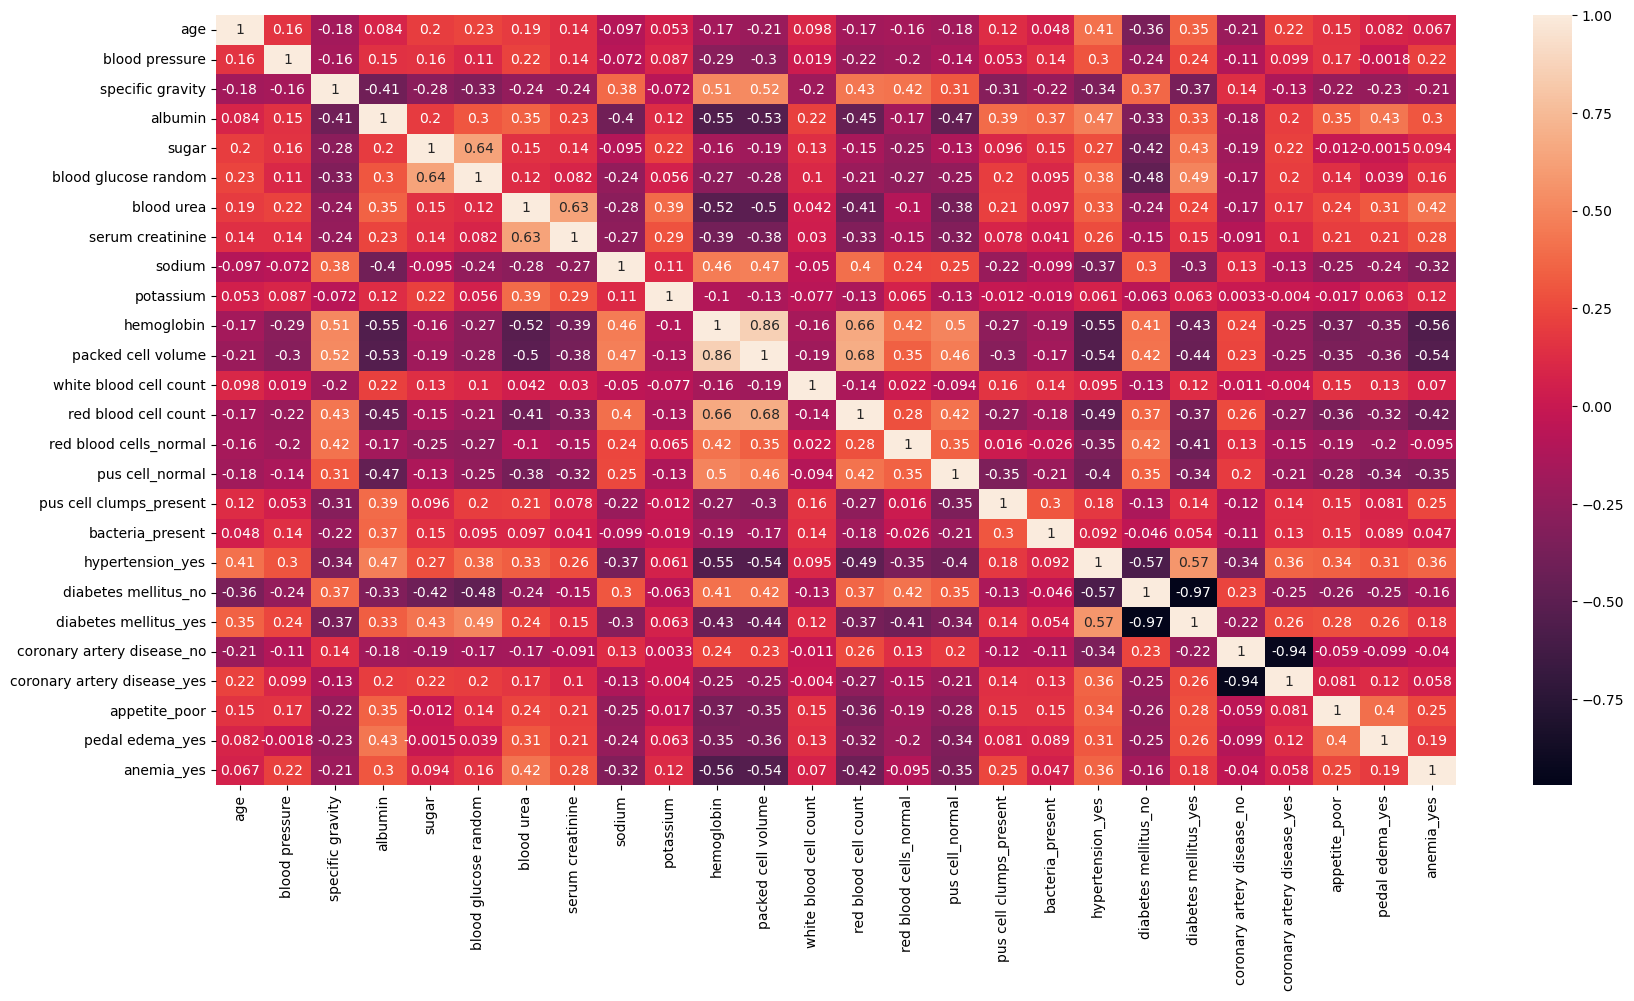

In [22]:
# check for correlations
import matplotlib.pyplot as plt
df_corr = X_train.corr()
import seaborn as sns

plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True)

In [23]:
import matplotlib.pylab as pylab
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler

In [24]:
## decision tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
base_pred = model.predict(X_test)

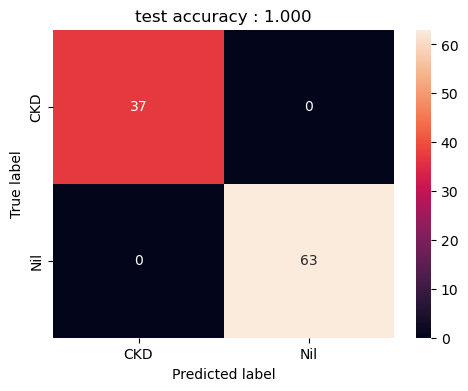

In [25]:
## evaluation metrics for decison tree classifier model
from sklearn.metrics import confusion_matrix,classification_report,confusion_matrix
confusion_kidney=confusion_matrix(y_test,base_pred)
plt.figure(figsize=(5.5,4))
sns.heatmap(confusion_kidney, annot=True , 
            xticklabels=['CKD','Nil'], 
            yticklabels=['CKD','Nil'])
plt.title('test {} : {:.3f}'.format( "accuracy" , 
                                    accuracy_score(y_test,base_pred)  ))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
## random forest classifier
from sklearn.metrics import confusion_matrix,accuracy_score
grid_values = {'criterion': ['entropy','gini'],
               'n_estimators':[25,50,75,100,125,150,175,200], 
               'max_depth':[2,6],
               'min_samples_split':[10,50],
              'min_samples_leaf':[10,20]}

grid_rf_roc_auc = GridSearchCV(RandomForestClassifier(n_jobs=-1,class_weight='balanced'), 
                             param_grid = grid_values, 
                             scoring='roc_auc_ovr_weighted',n_jobs=-1)

grid_rf_roc_auc.fit(X_train, y_train)

y_decision_fn_scores_roc_auc=grid_rf_roc_auc.score(X_test, y_test)


print(f'Grid best score (roc_auc_ovr_weighted): {grid_rf_roc_auc.best_score_:.3f}')
print('Grid best parameter (max. roc_auc_ovr_weighted): ')
for k,v in grid_rf_roc_auc.best_params_.items():
    print('\t',k,'->',v)

/Users/subasrees/Desktop/anaconda3/envs/introML/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/subasrees/Desktop/anaconda3/envs/introML/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/subasrees/Desktop/anaconda3/envs/introML/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/subasrees/Desktop/anaconda3/envs/introML/lib/python3.11/site-packages/sklearn/base.py:1

Grid best score (roc_auc_ovr_weighted): 0.999
Grid best parameter (max. roc_auc_ovr_weighted): 
	 criterion -> entropy
	 max_depth -> 6
	 min_samples_leaf -> 10
	 min_samples_split -> 10
	 n_estimators -> 150


/Users/subasrees/Desktop/anaconda3/envs/introML/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [27]:
RF = grid_rf_roc_auc.best_estimator_

w=RF.feature_importances_#get the weights

featureW = pd.DataFrame( {'feature': df.columns,'weight':w} )

# sort them by absolute value
featureWsorted = featureW.sort_values(by=['weight'] , 
                                      ascending=False , 
                                      key=lambda col : col.abs())

# get the non-null ones
print('Features sorted per importance:')
featureWsorted.loc[ featureWsorted["weight"] !=0 ]

Features sorted per importance:


,feature,weight
10,hemoglobin,2.240030e-01
11,packed cell volume,1.677965e-01
2,specific gravity,1.269500e-01
7,serum creatinine,1.071577e-01
3,albumin,8.288983e-02
14,red blood cells_normal,7.538670e-02
13,red blood cell count,5.023620e-02
5,blood glucose random,4.071960e-02
18,hypertension_yes,3.529585e-02
19,diabetes mellitus_no,1.932267e-02


In [28]:
## naives bayes, SVC and k neighbors classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [29]:
models=[]
models.append(('naive_bayes',GaussianNB()))
models.append(('svm',SVC(kernel='linear')))
models.append(('neighbors',KNeighborsClassifier(n_neighbors=10)))

In [30]:
## evaluation metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [31]:
for name, model in models:
    print(name,model)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print("recall:",recall_score(y_test,y_pred))
    print('confusion matrix:',confusion_matrix(y_test,y_pred))

naive_bayes GaussianNB()
recall: 0.9365079365079365
confusion matrix: [[34  3]
 [ 4 59]]
svm SVC(kernel='linear')


/Users/subasrees/Desktop/anaconda3/envs/introML/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/subasrees/Desktop/anaconda3/envs/introML/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


recall: 1.0
confusion matrix: [[37  0]
 [ 0 63]]
neighbors KNeighborsClassifier(n_neighbors=10)
recall: 0.5396825396825397
confusion matrix: [[32  5]
 [29 34]]


/Users/subasrees/Desktop/anaconda3/envs/introML/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Conclusions:
Best classifier for the kidney disease dataset are 
1. Decison Trees
2. Suppot Vector Machines
3. Random trees classifier (150 estimators and 10 leaves)

The Naive_bayes did not perform upto the mark of the above three classifiers

K nearest neighnors perform poorly in this dataset